This dataset is a collection of basic health biological signal data which
contains around 55K record with 27 attributes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [4]:
df['oral'].unique()

array(['Y'], dtype=object)

In [5]:
# Since ID and Oral are nominal attributes and will not add value to any analysis we drop the columns
df.drop(columns=['ID','oral'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [7]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

EDA

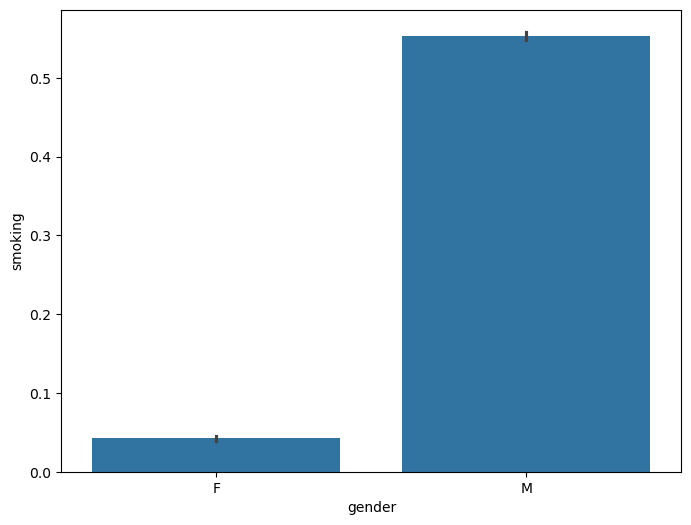

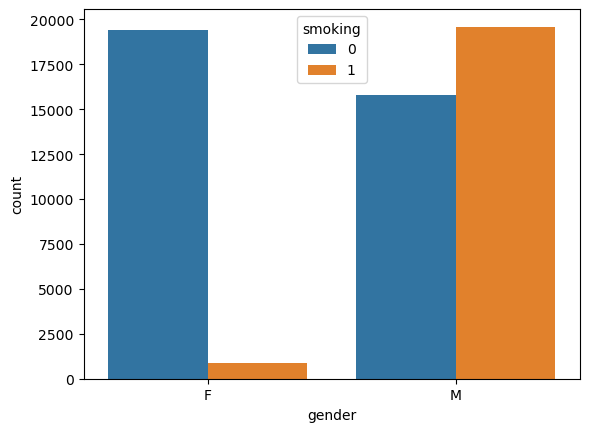

In [23]:
# genderwise smoking plot
plt.figure(figsize=(8,6))


sns.barplot(x=df['gender'],y=df['smoking'])
plt.show()
sns.countplot(x='gender',hue='smoking',data=df)
plt.show()

From both charts it is evident that men are the maximum smokers

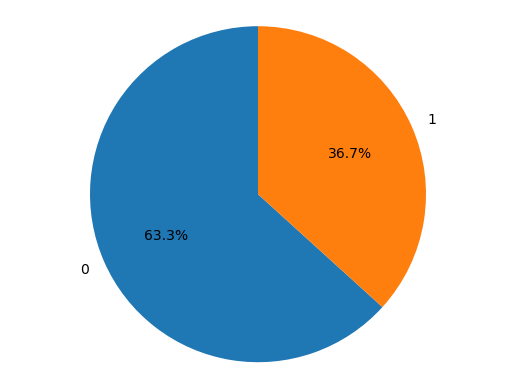

In [24]:
# Pie chart which shows 36.7% are smokers
value_counts=df['smoking'].value_counts()
labels=value_counts.index
frequencies=value_counts.values
plt.figure()
plt.pie(frequencies,labels=labels,autopct='%1.1f%%',startangle=90)
plt.axis('equal')
plt.show()

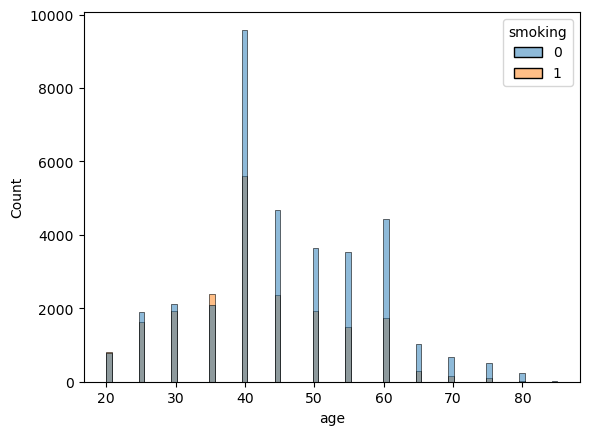

In [30]:
sns.histplot(x='age',hue='smoking',data=df)
plt.show()

It shows the person with age 40 are maximum smokers

Representation of columns using boxplot to detect outliers. Here outliers represent natural
variations in the population, and they should be left as is in the dataset. These are called true
outliers. Therefore for this dataset we will not remove outliers.

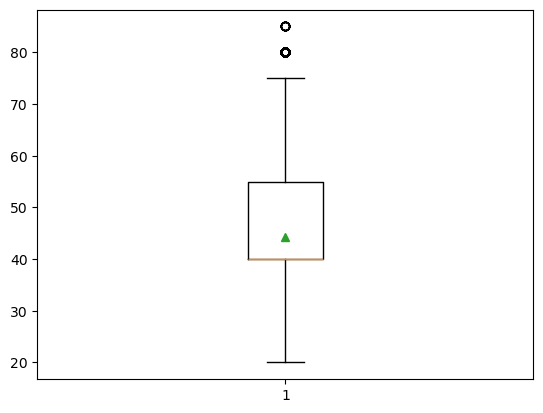

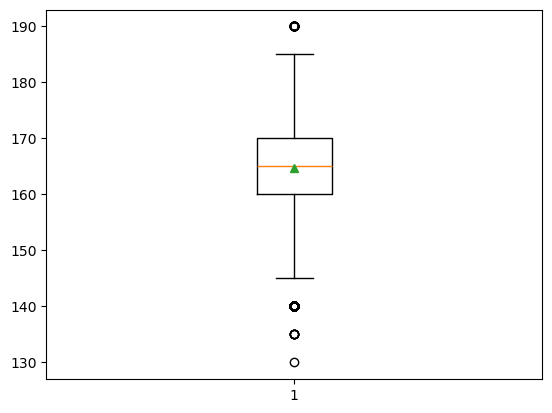

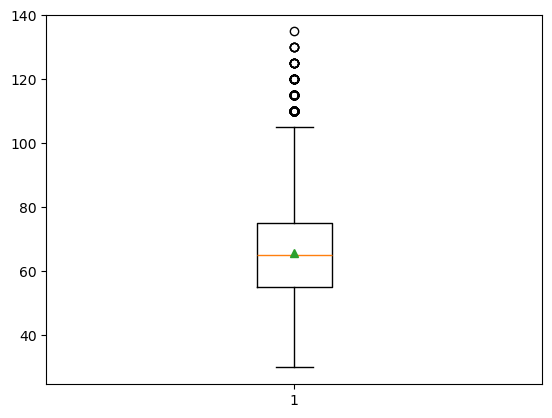

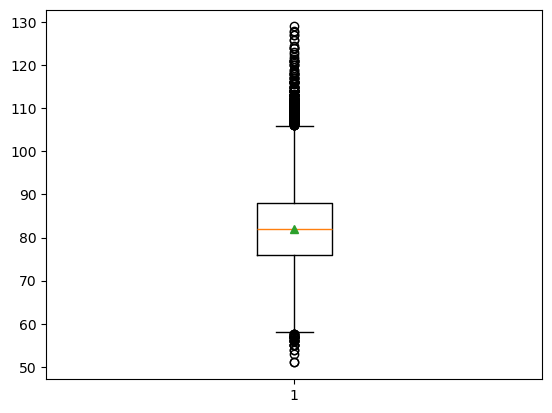

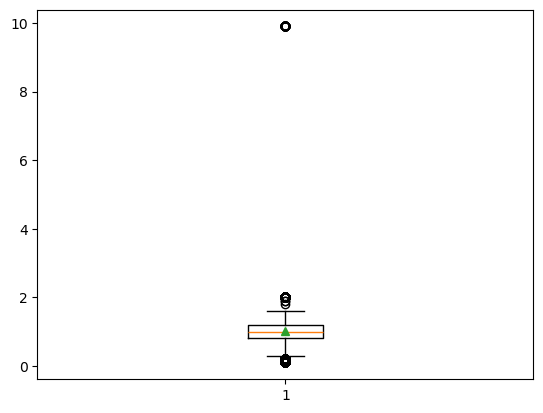

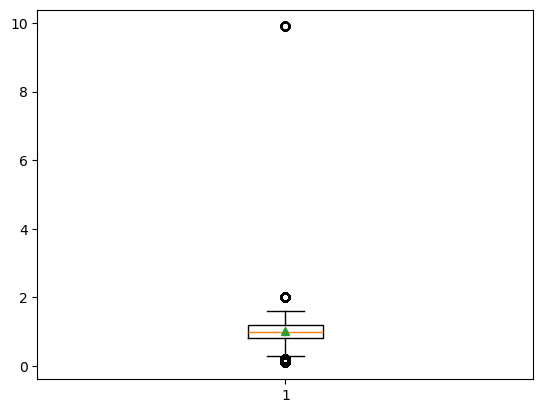

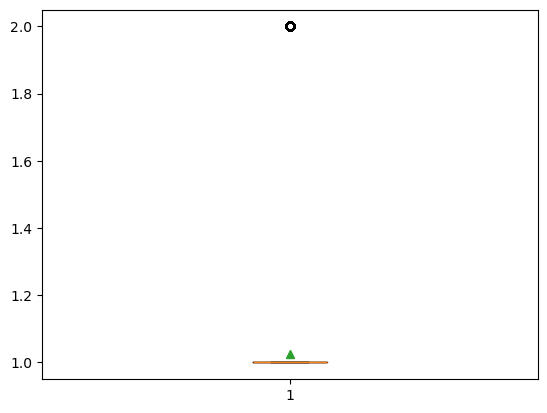

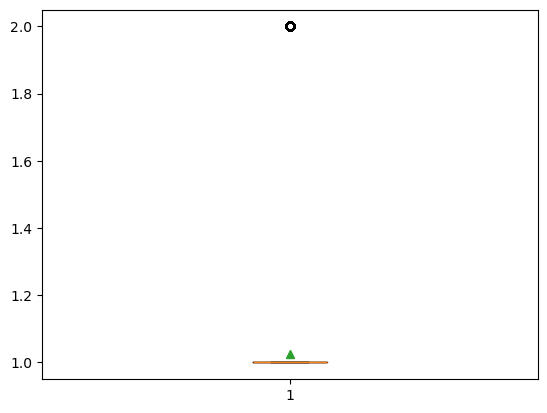

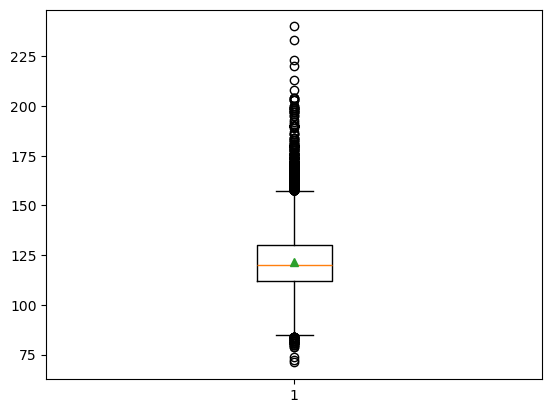

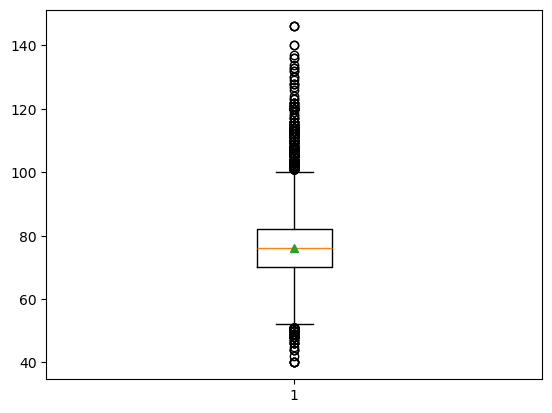

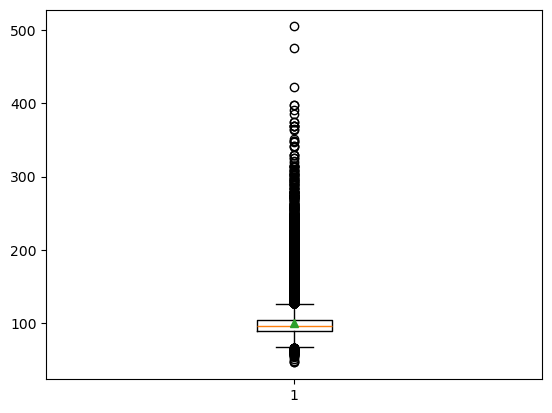

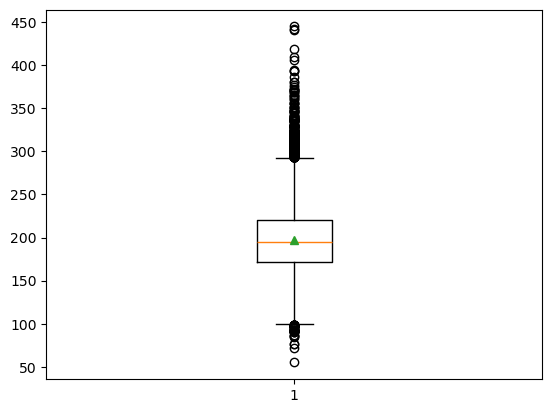

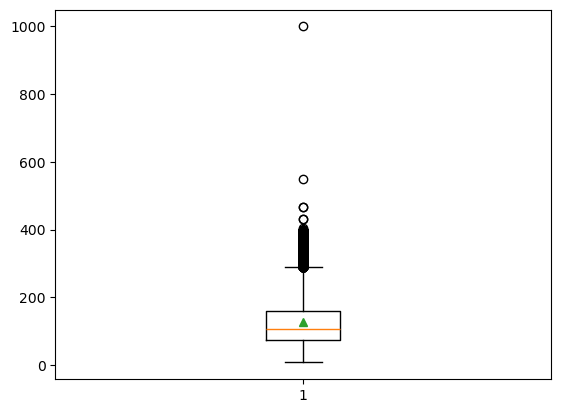

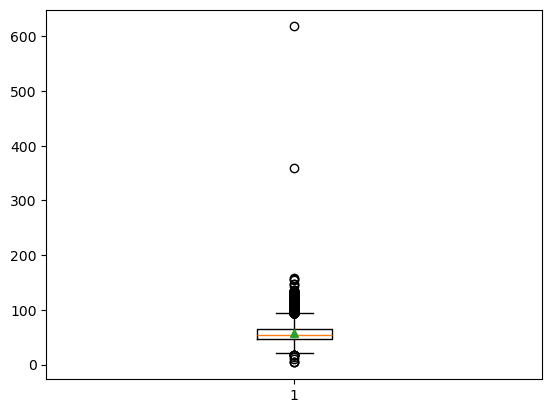

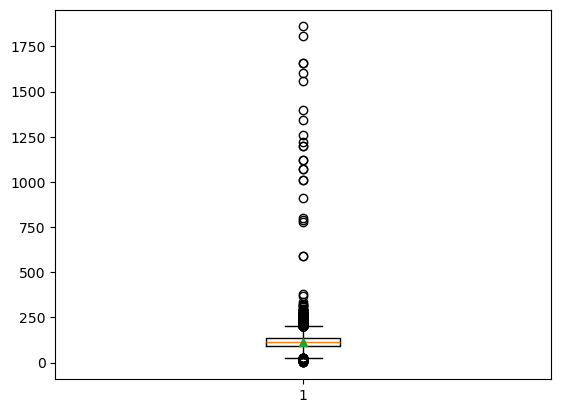

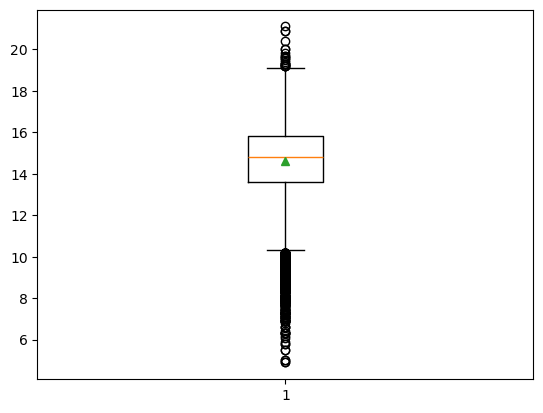

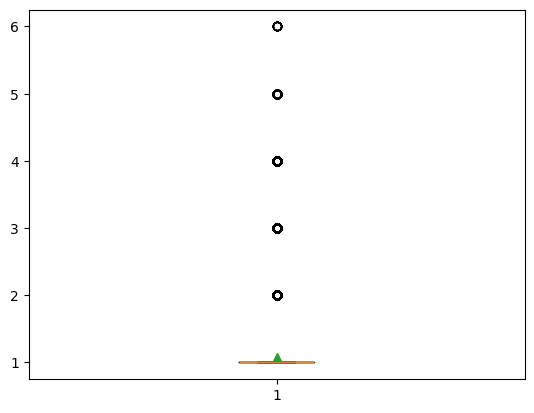

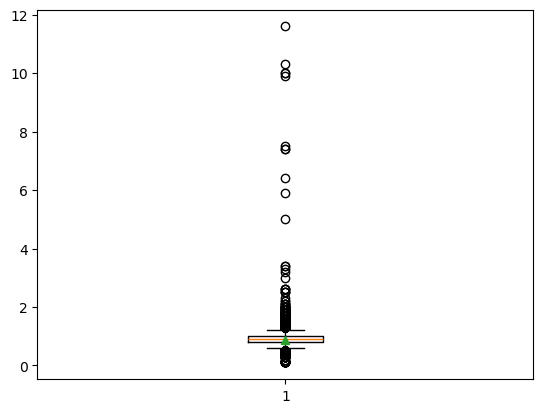

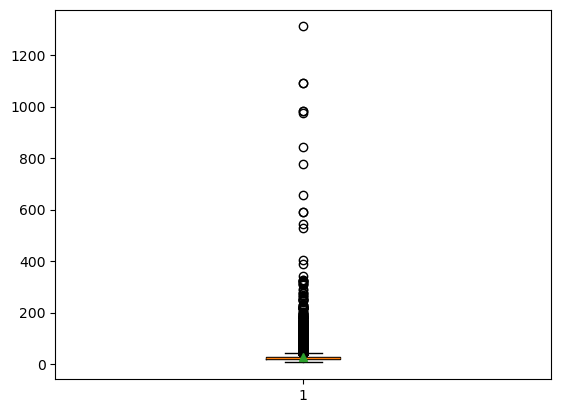

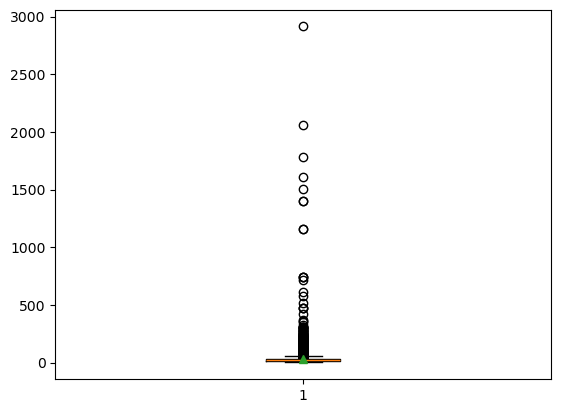

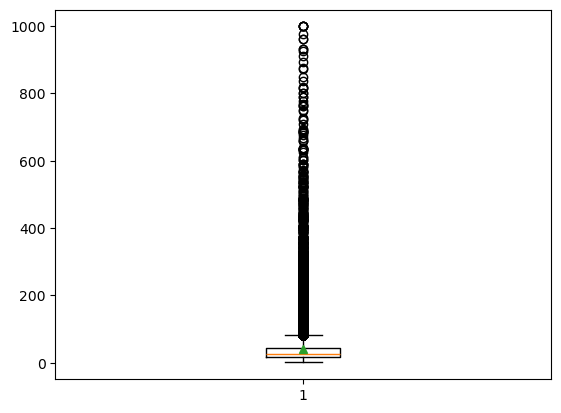

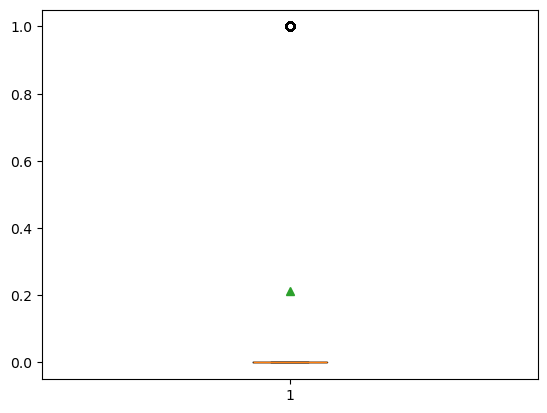

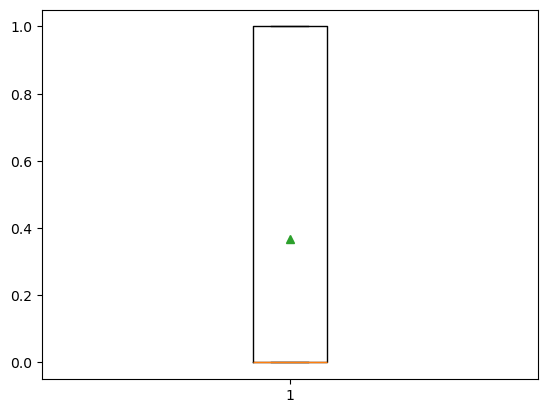

In [42]:
plt.figure()

fig.suptitle('Outliers in attributes')

for i in df.columns:
    if (df[i].dtypes=='int64') or (df[i].dtypes=='float64'):
        plt.boxplot(df[i],showmeans = True)
        plt.show()

In RandomForest, it select the best split to convert the parent into the two most homogeneous child nodes. In an ExtraTreesClassifier, it selects a random split to divide the parent node into two random child nodes.

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest. Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees. To perform feature selection using the above forest structure, during the construction of the forest, for each feature, the normalized total reduction in the mathematical criteria used in the decision of feature of split (Gini Index if the Gini Index is used in the construction of the forest) is computed. This value is called the Gini Importance of the feature. To perform feature selection, each feature is ordered in descending order according to the Gini Importance of each feature and the user selects the top k features according to his/her choice.

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])
df.info()        


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

<Figure size 800x800 with 0 Axes>

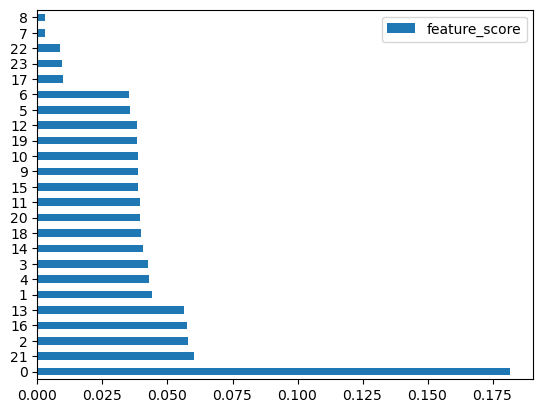

In [9]:
x=df.iloc[:,:-1]
y=df['smoking']
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier(random_state=1)
etc.fit(x,y)
df1=pd.DataFrame(columns=['features','feature_score'])
df1['features']=x.columns
df1['feature_score']=etc.feature_importances_
plt.figure(figsize=(8,8))
df1.nlargest(24,columns='feature_score').plot(kind='barh')
plt.show()

We take first 15 features out of 24 features

In [10]:
df1.nlargest(24,columns='feature_score')

,features,feature_score
0,gender,0.181653
21,Gtp,0.060247
2,height(cm),0.057706
16,hemoglobin,0.057483
13,triglyceride,0.056431
1,age,0.044038
4,waist(cm),0.042931
3,weight(kg),0.042477
14,HDL,0.040558
18,serum creatinine,0.039869


In [109]:
x=df[['gender','Gtp','height(cm)','hemoglobin','triglyceride','age','waist(cm)','weight(kg)','HDL','serum creatinine','ALT','fasting blood sugar','LDL','systolic','relaxation']]
y=df['smoking']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=15)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
scaling=StandardScaler()
x_train_sc=scaling.fit_transform(x_train)
x_test_sc=scaling.transform(x_test)
log_r=LogisticRegression()
log_r.fit(x_train_sc,y_train)
y_pred=log_r.predict(x_test_sc)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :73.90250471316995%
classification report :
               precision    recall  f1-score   support

           0       0.76      0.82      0.79      6638
           1       0.70      0.62      0.66      4501

    accuracy                           0.74     11139
   macro avg       0.73      0.72      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :78.14884639554718%
classification report :
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      6959
           1       0.72      0.69      0.70      4180

    accuracy                           0.78     11139
   macro avg       0.77      0.76      0.77     11139
weighted avg       0.78      0.78      0.78     11139



Bagging Classifier

Bootstrap Aggregation or bagging involves taking multiple samples from the training dataset
(with replacement) and training a model for each sample.

In [114]:
from sklearn.ensemble import BaggingClassifier
bagging_clf=BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=1000)
bagging_clf.fit(x_train,y_train)
y_pred=bagging_clf.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :82.85303887243019%
classification report :
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      6849
           1       0.80      0.75      0.77      4290

    accuracy                           0.83     11139
   macro avg       0.82      0.81      0.82     11139
weighted avg       0.83      0.83      0.83     11139



Bagging Algorithm - ExtraTrees

In [115]:
from sklearn.ensemble import ExtraTreesClassifier
et_c=ExtraTreesClassifier(n_estimators=1000,random_state=11)
et_c.fit(x_train,y_train)
y_pred=et_c.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :83.2660023341413%
classification report :
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      6721
           1       0.82      0.74      0.78      4418

    accuracy                           0.83     11139
   macro avg       0.83      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [119]:
#Bagging Algorithm - RandomForest

from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier(n_estimators=1000,random_state=12)
rf_c.fit(x_train,y_train)
y_pred=rf_c.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :83.24804740102343%
classification report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      6821
           1       0.80      0.75      0.78      4318

    accuracy                           0.83     11139
   macro avg       0.83      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



In [121]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

# Naive Bayes is not robust to outliers

accuarcy :70.25765329024149%
classification report :
               precision    recall  f1-score   support

           0       0.64      0.86      0.73      5312
           1       0.81      0.56      0.66      5827

    accuracy                           0.70     11139
   macro avg       0.73      0.71      0.70     11139
weighted avg       0.73      0.70      0.70     11139



In [125]:
import xgboost as xgb
xgb_c=xgb.XGBClassifier(n_estimators=10,max_depth=5)
xgb_c.fit(x_train,y_train)
y_pred=xgb_c.predict(x_test)
acc=accuracy_score(y_pred,y_test)*100
class_report=classification_report(y_pred,y_test)
print(f'accuarcy :{acc}%')
print('classification report :\n',class_report)

accuarcy :75.7787952239878%
classification report :
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      6715
           1       0.71      0.65      0.68      4424

    accuracy                           0.76     11139
   macro avg       0.75      0.74      0.74     11139
weighted avg       0.76      0.76      0.76     11139



In [20]:
# Spot check algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,cross_val_score

x=df[['gender','Gtp','height(cm)','hemoglobin','triglyceride','age','waist(cm)','weight(kg)','HDL','serum creatinine','ALT','fasting blood sugar','LDL','systolic','relaxation']]
y=df['smoking']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=7)

In [23]:
models=[]
scoring='accuracy'
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CART',ExtraTreesClassifier()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

results=[]
name=[]
for names,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    name.append(names)
    msg='%s %f %f'%(names,cv_results.mean(),cv_results.std())
    print(msg)

LR 0.740444 0.006478
CART 0.821269 0.003979
LDA 0.736875 0.006643
KNN 0.708100 0.004061
Naive Bayes 0.702915 0.007291
SVM 0.739411 0.005478


In [24]:
# comparing alogorithm and select the best model
fig=plt.figure()
fig.suptitle("alogorithm comparison")
ax=fig.add_subplot(111)
plt.boxplot(results,showmeans=True)
ax.set_xticklabels(names)
plt.show()

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (3).